# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Generate dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the machine learning algorithm created

In [1]:
import dataTools as dt

In [2]:
%%time

X_train, Y_train = dt.create_train_data(0.01)

Generating TRAIN data...
Creating dataset...
Number of the lines in the dataset: 99840
Number of the lines in the dataset: 998

Finished creating dataset

CPU times: user 9.92 s, sys: 219 ms, total: 10.1 s
Wall time: 10.1 s


In [3]:
%%time

X_test, Y_test = dt.create_test_data(0.01)

Generating TEST data...
Creating dataset...
Number of the lines in the dataset: 20800
Number of the lines in the dataset: 208

Finished creating dataset

CPU times: user 2.25 s, sys: 60.2 ms, total: 2.31 s
Wall time: 2.3 s


In [4]:
%%time

X_validation, Y_validation = dt.create_validation_data(0.01)

Generating VALIDATION data...
Creating dataset...
Number of the lines in the dataset: 24960
Number of the lines in the dataset: 249

Finished creating dataset

CPU times: user 2.5 s, sys: 68 ms, total: 2.57 s
Wall time: 2.56 s


## **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [5]:
import knn
from sklearn.metrics import accuracy_score

In [8]:
def generate_feature_row(dataset):
    letters_with_features = []
    for i in range(dataset.length):
        target = dataset.letters[i].target
        features = dataset.letters[i].features.values()
        features.append(target)

        letters_with_features.append(features)

    return letters_with_features

In [15]:
%%time

X_train = generate_feature_row(dt.create_train_data_list(0.01))

Generating TRAIN data...
Creating dataset...
Number of the lines in the dataset: 99840
Number of the lines in the dataset: 998

Finished creating dataset

CPU times: user 9.4 s, sys: 211 ms, total: 9.61 s
Wall time: 9.6 s


In [16]:
%%time

X_validation = generate_feature_row(dt.create_validation_data_list(0.01))

Generating VALIDATION data...
Creating dataset...
Number of the lines in the dataset: 24960
Number of the lines in the dataset: 249

Finished creating dataset

CPU times: user 2.35 s, sys: 60.2 ms, total: 2.41 s
Wall time: 2.4 s


In [17]:
%%time

X_test = generate_feature_row(dt.create_test_data_list(0.01))

Generating TEST data...
Creating dataset...
Number of the lines in the dataset: 20800
Number of the lines in the dataset: 208

Finished creating dataset

CPU times: user 2.13 s, sys: 52.2 ms, total: 2.18 s
Wall time: 2.18 s


In [18]:
def knn_train(num_neighbors, norm):
    print("Using " + str(num_neighbors) + " neighbors")
    print("Using the " + norm + " norm\n")
    predicted = knn.k_nearest_neighbors(X_train, X_train, num_neighbors, norm)
   
    print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%\n")
    
    return predicted

In [19]:
%%time 

predicted_train_l2 = knn_train(5, 'l2')

Using 5 neighbors
Using the l2 norm

The train accuracy is: 32.164%

CPU times: user 5.53 s, sys: 50.8 ms, total: 5.58 s
Wall time: 5.4 s


In [20]:
%%time 

predicted_train_l1 = knn_train(5, 'l1')

Using 5 neighbors
Using the l1 norm

The train accuracy is: 34.068%

CPU times: user 3.67 s, sys: 32.3 ms, total: 3.71 s
Wall time: 3.67 s


In [21]:
def knn_validation(num_neighbors, norm):
    print("Using " + str(num_neighbors) + " neighbors")
    print("Using the " + norm + " norm\n")
    predicted = knn.k_nearest_neighbors(X_train, X_validation, num_neighbors, norm)
   
    print("The train accuracy is: " + str(round((accuracy_score(Y_validation, predicted) * 100), 3)) + "%\n")
    
    return predicted

In [22]:
%%time 

predicted_validation_l2 = knn_validation(5, 'l2')


Using 5 neighbors
Using the l2 norm

The train accuracy is: 9.237%

CPU times: user 1.44 s, sys: 53.6 ms, total: 1.5 s
Wall time: 1.39 s


In [23]:
%%time 

predicted_validation_l1 = knn_validation(5, 'l1')

Using 5 neighbors
Using the l1 norm

The train accuracy is: 10.04%

CPU times: user 971 ms, sys: 12.2 ms, total: 983 ms
Wall time: 961 ms


## **Visualizing the study**

This part consist a better visualization of the study done to better analyse the classifier

In [27]:
import matplotlib.pyplot as plt 
import itertools
from sklearn.metrics import confusion_matrix
import string
import numpy as np

In [28]:
def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = string.ascii_uppercase
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    #plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The train accuracy is: 32.164%

The train accuracy is: 34.068%



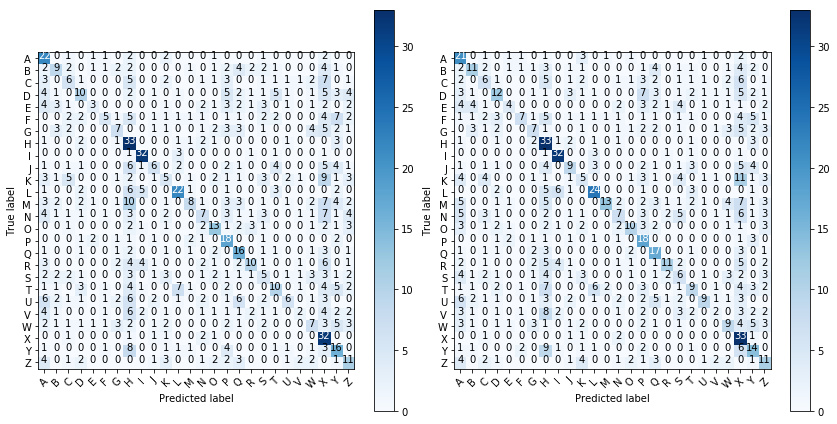

In [29]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.title('Train Confusion Matrix')

plt.subplot(121)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train, Y_train, predicted_train_l2)
print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted_train_l2) * 100), 3)) + "%\n")

plt.subplot(122)
# plt.title("Train accuracy is: " + str(round((accuracy_score(train_y[:M], predicted_train) * 100), 3)) + "%")
plot_confusion_matrix(X_train, Y_train, predicted_train_l1)
print("The train accuracy is: " + str(round((accuracy_score(Y_train, predicted_train_l1) * 100), 3)) + "%\n")


plt.savefig("./Results/Train")



The validation accuracy is: 9.237%

The validation accuracy is: 10.04%



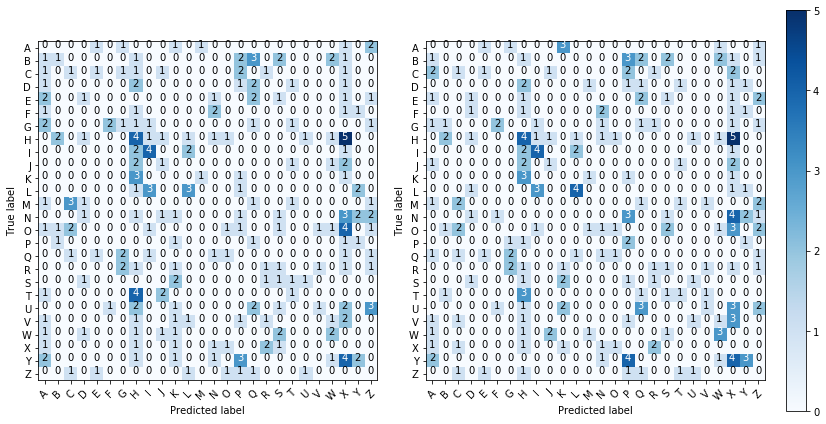

In [30]:
plt.figure(figsize=(12,6))
plt.title('Validation Confusion Matrix')

plt.subplot(121)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation, Y_validation, predicted_validation_l2)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation, predicted_validation_l2) * 100), 3)) + "%\n")

plt.subplot(122)
#plt.title("Validation accuracy is: " + str(round((accuracy_score(validation_y[:M], predicted_validation) * 100), 3)) + "%")
plot_confusion_matrix(X_validation, Y_validation, predicted_validation_l1)
print("The validation accuracy is: " + str(round((accuracy_score(Y_validation, predicted_validation_l1) * 100), 3)) + "%\n")



plt.savefig("./Results/Validation")
#plt.show()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model

In [31]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_validation  = []

    for neighbors in values:
        
        print neighbors

        prediction_train = []
        prediction_validation = []

        prediction_train = knn.k_nearest_neighbors(X_train, X_train, neighbors, 'l2')
        accs_train.append(accuracy_score(Y_train, prediction_train))

        prediction_validation = knn.k_nearest_neighbors(X_train, X_validation, neighbors, 'l2')
        accs_validation.append(accuracy_score(Y_validation, prediction_validation))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_validation)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_validation,  label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k neighbors')
    plt.legend()
    plt.xticks(values)
    plt.show()  

2
3
Optimal number for k: 3


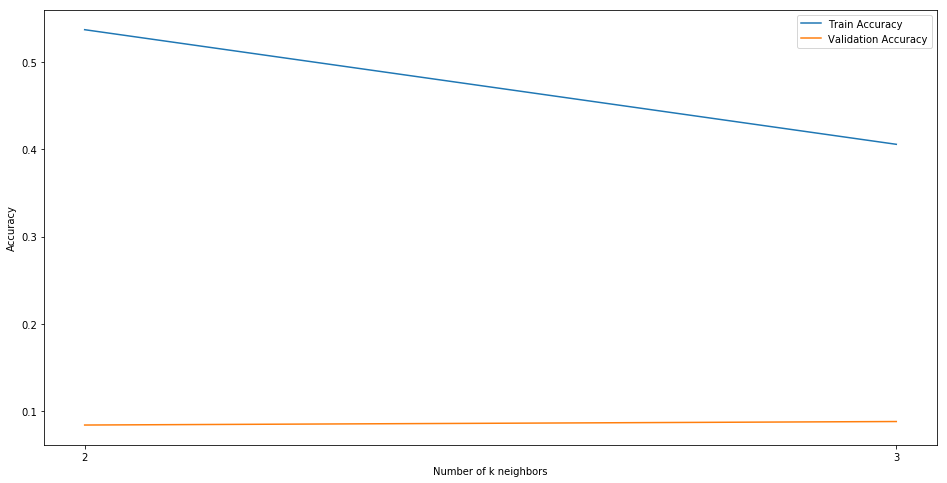

CPU times: user 14.4 s, sys: 392 ms, total: 14.8 s
Wall time: 14.1 s


In [32]:
%%time 

tuning_parameter_new_knn(2, 4)

## **Best K-Nearest Neighbors model**

Finally after making the study of the hyperparameters we make another study to see the gain in performance

In [33]:
neighbor = 2
norm = 'l2'

In [34]:
%%time 

best_predicted_train = knn_train(neighbor, norm)

Using 2 neighbors
Using the l2 norm

The train accuracy is: 53.707%

CPU times: user 5.73 s, sys: 44.5 ms, total: 5.78 s
Wall time: 5.7 s


In [35]:
print("Test dataset has: " + str(test_set.length) + " letters")

Test dataset has: 208 letters


In [36]:
def knn_test(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_test, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_test, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [37]:
%%time 

predicted_test = knn_test(neighbor, norm)

The validation accuracy is: 6.731%

CPU times: user 1.51 s, sys: 11.8 ms, total: 1.52 s
Wall time: 1.51 s


In [38]:
def knn_train(n_neighbors, norm):  
    #Predict the results of the train dataset
    predicted = knn.k_nearest_neighbors(X_train, X_train, n_neighbors, norm)

    print("The validation accuracy is: " + str(round((accuracy_score(Y_train, predicted) * 100), 3)) + "%\n")

    
    return predicted

In [39]:
%%time 

predicted_train = knn_train(neighbor, norm)

The validation accuracy is: 53.707%

CPU times: user 6.77 s, sys: 60 ms, total: 6.83 s
Wall time: 6.74 s


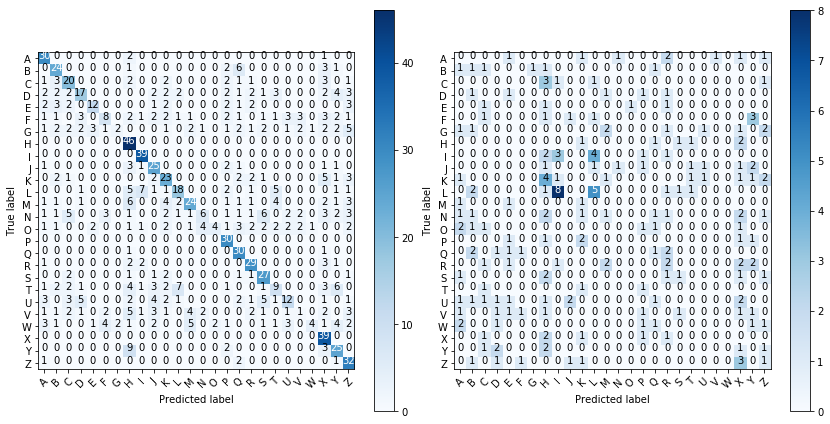

In [40]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(X_train, Y_train, predicted_train)

plt.subplot(122)
plot_confusion_matrix(X_test, Y_test, predicted_test)
plt.show()